In [5]:
import cartopy.crs as crs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
clon = 120
clat = 10

In [7]:
geo_file=xr.open_dataset('/Users/daniel/resources/geo_em_files/geo_em.d01.Oned_32km_ERA5.nc')
lat = geo_file.XLAT_M.squeeze().values
lon = geo_file.XLONG_M.squeeze().values
latint_border = np.concatenate((lat[0,:],lat[:,-1],lat[-1,::-1],lat[::-1,0]))
lonint_border = np.concatenate((lon[0,:],lon[:,-1],lon[-1,::-1],lon[::-1,0]))

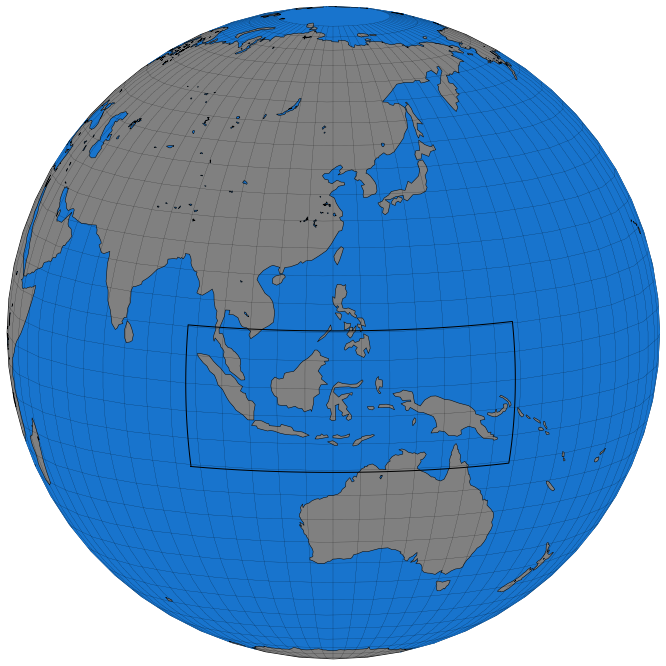

In [8]:
lakes50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m')


cart_proj=crs.Orthographic(central_longitude=clon, central_latitude=clat, globe=None)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1,projection=cart_proj)
ax.set_global()
ax.add_feature(cfeature.OCEAN, zorder=100,facecolor=[24/255,  116/255,  205/255])
ax.add_feature(cfeature.LAND, zorder=100, edgecolor=None,facecolor='gray')
ax.add_feature(lakes50m, zorder=100,linewidth=0.5,edgecolor='k',facecolor=[24/255,  116/255,  205/255])

ax.plot(lonint_border,latint_border,linewidth=1,color='k',transform=crs.PlateCarree(),zorder=102)
ax.coastlines(linewidth=0.5,zorder=103)
gl = ax.gridlines(crs=crs.PlateCarree(), xlocs=range(-180,181,5), ylocs=range(-80,81,5),
                  draw_labels=False, zorder=103,
                  linewidth=0.2, color='k', alpha=1, linestyle='--')


plt.show()


